# Load data saved from evaluation

Be sure to enable the include_images file to visualize observations

The dataset will be a dictionary with `obs` , `acts` , `news` keys. `news` is similar to dones, it indicates if a new episode has started.

In [2]:
import numpy as np

"""
loads data
get image observations
observation tensor has shape (n_steps, n_workers, H, W, C)
"""

data = np.load('mario_data.npy',allow_pickle=True)


videos = data.item().get('obs')
videos = np.transpose(videos,(1,0,2,3,4))
videos = np.concatenate(videos,0)

# only grab first 1200 frames (~1 min video), otherwise this will be a long video
video = videos[:1200,:,:,:]
print('TOTAL FRAMES',videos.shape[0])

TOTAL FRAMES 65536


# Display recorded policy video


In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# video needs to be an np array with shape (frames, height, width, channels)

fig = plt.figure()
im = plt.imshow(video[0,:,:,:])

plt.close() # this is required to not display the generated image

def init():
    im.set_data(video[0,:,:,:])

def animate(i):
    im.set_data(video[i,:,:,:])
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=video.shape[0],
                               interval=50)
HTML(anim.to_html5_video())

# Get actions and news

In [5]:
# retrieves actions / news for 1 worker
actions = data.item().get('acts')[:,0]
news = data.item().get('news')[:,0]

print(actions)
print('N ACTIONS',actions.shape[0])

[11 11 11 11 11 11 11 11 11 11 13 13 13  2 11 11 11 13 13 10  0  0 12 12
  3  2  0 13 13 13 13 11 11 11  6 11 11 11 11 13 13 12 11 11 11  0 13 13
 12 12 12 13 11 12 12  1 10 13 11 11 11 12 13 12 11 11  1 11  1  1 13 13
 13 13  7  1 13  7  7 11 11 11 13 11 11 11 10 10  7 13 13  7  2  1  6 12
 12  2  2  2 11 13 13 13 13  2  3  3 12 12 12 12 12  6  6 12  8  8  8 13
  8  1 13 13 13 13 13 13 13 13  6  1  7 13 12 13 13 13 13 13 13  1  1  8
  1 13 12 13  1  1  1  1  1  0  5  9  8  8  8  1  1  5 11 13 11 11 11  7
  8  8  9  6  3  3 11 11  1  8  6  4 13 11  1  7  1  1 13  5 11 11 13  8
  9 13 13 13 13 13 12  1  6  7  6  7  1 13 12 11  1  0  8  8  9  8  4  3
  4  1  9  9  9  9  9  8  3  8  8  3  0  9  7 10  5 11 11 11 11 11 11 12
 12 12  6  3 11 11 11 11 11 11 11 12 11 12 12 12 11 11  9  7  9  3 10 10
  3  8  8  8 10  9 10 10 10 10  8  8 13  0  7  8  9 10  8 12  3  1 11 11
 11 12 12 12 12 12 11 13 11 12 12 11 11 11 12 12 12 12  7 11 13 11 13  9
  8  8  9  9  9 10  9  8  9  9  9  9  9  8  8  8  8

In [11]:
import pandas as pd
dir_ = '/tmp/openai-2019-11-15-17-16-54-122193/'
x = '/tmp/openai-2019-11-15-17-16-54-122193/123.monitor.csv'
df = pd.read_csv(x,skiprows=1)

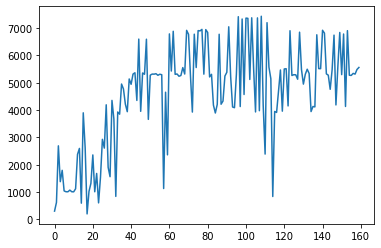

In [12]:
plt.plot(df['r'])